# Projet : Statistique en Grande Dimension

Solène Lesage

## Exercice 2

On dispose d'une base de données issus du cancer du sein.
On souhaite prédire la réaction à un traitement donnée par la variable "treatment_response" à partir de données génétiques et d'autres variables (âge, ethnie, stade de la tumeur).

Pour cela, nous souhaitons exploiter ce jeu de données en cherchant par exemple à explorer les relations entre les différentes variables, à comprendre l'influence des variables dans un modèle, de sélectionner les variables les plus influentes et même de classer les individus selon une variable selon un objectif de prédiction.

### Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Les données sont sous le format p variables x n individus (on inverse les lignes et colonnes en utilisant la transposée pour lire le jeu de données)
data = pd.read_csv("./GSE16716_BreastCancers_2.csv", sep=None, header=None, index_col = 0).transpose()
data.head(10)

,Sample_geo_accession,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,GSM505327,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
2,GSM505328,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
3,GSM505329,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
4,GSM505330,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
5,GSM505331,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769
6,GSM505333,BR_FNA_M154,breast cancer cells,29,white,RD,4,2,3,N,...,8.2056,9.0685,16.3945,16.2897,4.4268,2.3969,5.3595,3.7958,6.2377,4.0743
7,GSM505334,BR_FNA_M165,breast cancer cells,50,black,RD,2,1,2,N,...,7.1365,8.2652,14.9208,14.6787,2.7966,3.494,5.0246,1.5554,2.7321,2.5643
8,GSM505335,BR_FNA_M212,breast cancer cells,42,asian,pCR,2,1,3,N,...,7.2559,9.1148,15.9891,15.8078,3.7453,5.4397,2.871,2.7827,2.8683,1.9794
9,GSM505336,BR_FNA_M153,breast cancer cells,61,white,pCR,1,1,3,P,...,7.0541,7.6801,15.0246,14.7647,3.8925,2.9347,4.1339,1.9527,2.5523,2.1316
10,GSM505337,BR_FNA_M220,breast cancer cells,38,white,RD,3,1,3,N,...,8.6833,9.4582,16.5708,16.5972,4.1771,4.7142,6.7667,2.227,6.6432,3.3718


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 1 to 278
Columns: 22299 entries, Sample_geo_accession to AFFX-TrpnX-M_at
dtypes: object(22299)
memory usage: 47.3+ MB


In [4]:
# Affichage des noms des colonnes
print(data.columns)

Index(['Sample_geo_accession', 'Sample_title', 'tissue', 'age', 'ethnicity',
       'treatment_response', 'T (tumor)', 'N (Node)', 'bmn_grade',
       'PR_status: ',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', name=0, length=22299)


In [5]:
# Nombre d'individus et de variables dans le jeu de données
print(f"Le jeu de données possède {data.shape[0]} individus et {data.shape[1]} variables.")

Le jeu de données possède 278 individus et 22299 variables.


### Pré-traitement des données : valeurs manquantes + suppression individus & variables

In [6]:
print(f"Le jeu de données possède {data.isnull().sum().sum()} valeurs manquantes.")

Le jeu de données possède 63 valeurs manquantes.


On pourrait choisir d'enlever tous les individus qui possèdent des valeurs manquantes avec la commande .dropna() mais du fait du faible nombre d'observations par rapport au nombre important de variable. 
On va adopter différentes approches pour en supprimer le moins possible.

In [7]:
# Nombre de valeurs manquantes par variable par ordre décroissant
data.isnull().sum().sort_values(ascending=False)

0
treatment code     19
ethnicity          10
T (tumor)          10
N (Node)           10
bmn_grade           8
                   ..
207902_at           0
207901_at           0
207900_at           0
207899_at           0
AFFX-TrpnX-M_at     0
Length: 22299, dtype: int64

In [8]:
# Pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = data.isnull().sum()
nb_na[nb_na>0]

0
age                1
ethnicity         10
T (tumor)         10
N (Node)          10
bmn_grade          8
histology          5
treatment code    19
dtype: int64

In [9]:
# Pour effectuer des modifications sur le jeu de données sans écraser les données, on effectue une copie
data_copy=data.copy()

In [10]:
print("Il y a",data_copy.duplicated().sum(), "doublons dans le jeu de données.")

Il y a 0 doublons dans le jeu de données.


#### Visualisation des modalités de quelques variables et de certains individus

In [11]:
data_copy['MAQC_Distribution_Status'].value_counts()

MAQC_T -- Training      130
MAQC_V -- Validation    100
MDA_R -- Not used        29
MAQC_Q -- Not used       19
Name: MAQC_Distribution_Status, dtype: int64

In [12]:
# Du fait du nombre important de modalités pour cette variable, on va la supprimer
data_copy['treatment code'].value_counts()

TFAC                                                                                           156
treatments comments: Taxol x 12 FAC x 4                                                         13
treatments comments: Taxol x 12 FEC x 4                                                         11
TFEC                                                                                            11
treatments comments: FAC x 4 Taxol x 12                                                          6
TH/FAC                                                                                           6
treatments comments: PACLITAXEL x 12, FEC x 4                                                    3
treatments comments: Taxol 80 mg/m2 x12, FAC X 4                                                 2
treatments comments: Taxol x 12 FAC x4                                                           2
TXFAC                                                                                            2
treatments

In [13]:
# Du fait du nombre important de modalités pour cette variable, on va la supprimer
data_copy['histology'].value_counts()

IDC                                              141
treatment code: TFAC                              51
treatment code: TFEC                              21
IDC/DCIS                                          20
treatments comments: Taxol x 12 FAC x 4            5
ILC                                                4
ILC/IDC                                            3
treatments comments: FAC x 6                       3
IDC+DCIS                                           3
IDC + DCIS                                         3
IDC+ILC                                            2
IDC/ILC                                            2
IDC/IBC                                            2
treatment code: FECT                               1
treatments comments: Taxol x 12 FEC x 4            1
IDC/LDC                                            1
treatment code: FACT+XRT/X                         1
treatment code: FACT                               1
treatments comments: PACLITAXEL x 12, FAC x 4 

In [14]:
data_copy.iloc[164:175,:]

,Sample_geo_accession,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
165,GSM505492,BR_FNA_US120,breast cancer cells,52,NaN,RD,NaN,NaN,NaN,N,...,10.2908,10.6343,17.8371,17.1194,5.2528,5.3119,7.9455,6.7254,5.7737,5.6089
166,GSM505493,BR_FNA_US123,breast cancer cells,NaN,NaN,RD,NaN,NaN,NaN,N,...,9.9775,10.5431,18.2366,17.987,6.9705,7.0458,6.2441,8.4615,6.141,5.9536
167,GSM505494,BR_FNA_US134,breast cancer cells,46,NaN,RD,NaN,NaN,NaN,P,...,6.4909,7.9426,14.5359,13.9004,4.7845,6.533,4.4078,5.2626,5.5928,5.1396
168,GSM505495,BR_FNA_US031,breast cancer cells,50,NaN,RD,NaN,NaN,3,N,...,9.5351,9.4057,18.2816,17.774,5.1106,8.2242,4.7581,7.7363,6.9077,7.8345
169,GSM505496,BR_FNA_US129,breast cancer cells,64,NaN,pCR,NaN,NaN,NaN,N,...,11.0111,12.2945,19.2089,18.9523,5.9496,5.5553,8.3866,3.7144,8.0507,6.4486
170,GSM505497,BR_FNA_US125,breast cancer cells,41,NaN,RD,NaN,NaN,NaN,N,...,10.9083,11.2952,18.6833,18.3378,5.7031,5.9805,8.0847,4.8375,5.5575,4.3951
171,GSM505498,BR_FNA_US147,breast cancer cells,46,NaN,RD,NaN,NaN,NaN,N,...,10.2741,10.5443,18.3701,17.9612,6.9139,5.294,6.3965,5.0047,6.2733,4.9996
172,GSM505499,BR_FNA_US002,breast cancer cells,36,NaN,RD,NaN,NaN,3,N,...,10.2657,10.6387,18.0564,17.4716,6.677,6.4593,7.7998,8.3977,6.0027,6.2628
173,GSM505500,BR_FNA_M314,breast cancer cells,46,black,RD,3,3,3,N,...,9.968,11.4912,17.7014,17.3825,5.5543,7.0252,7.3337,6.9638,6.1415,4.1039
174,GSM505501,BR_FNA_US092,breast cancer cells,61,NaN,RD,NaN,NaN,NaN,P,...,10.1005,10.1382,17.8541,17.4147,5.4801,7.8654,7.7049,3.0479,5.732,4.6062


In [15]:
# Supprime les lignes des individus 165 à 175 sauf 173 du fait des nombreuses erreurs de saisie dans les données
liste_indiv_supp = list(np.arange(165,173))+[174,175]
data_copy.drop(liste_indiv_supp, axis=0, inplace=True)

In [16]:
data_copy['bmn_grade'].value_counts()

3        148
2        104
1         13
er: 0      3
Name: bmn_grade, dtype: int64

In [17]:
# Pour limiter la suppression des 3 observations, on réalise des imputations grâce au mode de la variable
data_copy['bmn_grade'].replace(['er: 0'], data_copy['bmn_grade'].mode(), inplace=True)

In [18]:
data_copy['her2_status'].value_counts()

N                  203
P                   55
her2 ihc: 0          3
her2 ihc: NEG        2
her2 ihc: ND         1
her2 fish: 1.06      1
her2 ihc: 3          1
her2 ihc: 2          1
her2 fish: 1.9       1
Name: her2_status, dtype: int64

In [19]:
# On modifie la variable 'her2_status' pour avoir soit N ou P (negative ou positive) + aide Internet pour les identifier
data_copy['her2_status'].replace(['her2 ihc: 0'], 'N', inplace=True)
data_copy['her2_status'].replace(['her2 ihc: NEG'], 'N', inplace=True)
data_copy['her2_status'].replace(['her2 ihc: ND'], 'N', inplace=True)
data_copy['her2_status'].replace(['her2 fish: 1.06'], 'N', inplace=True)
data_copy['her2_status'].replace(['her2 ihc: 3'], 'P', inplace=True)
data_copy['her2_status'].replace(['her2 ihc: 2'], 'P', inplace=True)
data_copy['her2_status'].replace(['her2 fish: 1.9'], 'P', inplace=True)

In [20]:
# Suppression des variables cliniques, de la variable réponse "treatment_response" et des variables inutiles (1 seule modalité ...), bmn_grade car trop de valeurs manquantes
data_gene = data_copy.drop(["tissue", "Sample_geo_accession","Sample_title","ID_REF", 'treatment code','histology', 
                            "bmn_grade",'MAQC_Distribution_Status'],axis=1)

data_gene.head()

,age,ethnicity,treatment_response,T (tumor),N (Node),PR_status:,ER_status:,her2_status,1007_s_at,1053_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,57,white,RD,2,0,P,P,N,12.444,8.3774,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
2,69,asian,RD,2,1,P,P,N,12.2005,7.8592,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
3,77,mixed,RD,4,1,N,P,P,12.6709,8.6762,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
4,54,white,RD,2,1,N,P,N,11.6619,8.2557,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
5,75,black,RD,2,0,N,N,N,11.8397,8.7971,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [21]:
# Vérification qu'il ne reste plus de valeurs manquantes
data_gene.isnull().sum().sum()

0

In [22]:
# Pour chaque variable de notre jeu de données, on regarde leur modalités (pertinent seulement pour les variables catégorielles)
# var_categ = data_gene.columns
# for i in var_categ:
#     print(data_gene[i].value_counts())

In [23]:
# Nombre d'individus et de variables
print(f"Le jeu de données que nous utiliserons contient {data_gene.shape[0]} individus et {data_gene.shape[1]} variables.")
print(f"Nous avons enlevé {data.shape[0]-data_gene.shape[0]} individus et {data.shape[1]-data_gene.shape[1]} variables.")

Le jeu de données que nous utiliserons contient 268 individus et 22291 variables.
Nous avons enlevé 10 individus et 8 variables.


### Traitement des données

In [24]:
# Sélection des variables catégorielles
var_categorielles = data_gene[["PR_status: ", "ER_status: ", 'her2_status', 'treatment_response', 'ethnicity']]

# Traitement des variables catégorielles en variables numériques
data_var = pd.get_dummies(var_categorielles)
data_var = data_var.drop(["treatment_response_pCR"],axis=1)
data_var.rename(columns={'treatment_response_RD': 'treatment_response'}, inplace=True)
# Transforme toutes les variables en variables numériques
data_var = data_var.astype(int)
data_var.head(10)

,PR_status: _N,PR_status: _P,ER_status: _N,ER_status: _P,her2_status_N,her2_status_P,treatment_response,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_mixed,ethnicity_white
1,0,1,0,1,1,0,1,0,0,0,0,1
2,0,1,0,1,1,0,1,1,0,0,0,0
3,1,0,0,1,0,1,1,0,0,0,1,0
4,1,0,0,1,1,0,1,0,0,0,0,1
5,1,0,1,0,1,0,1,0,1,0,0,0
6,1,0,1,0,1,0,1,0,0,0,0,1
7,1,0,0,1,1,0,1,0,1,0,0,0
8,1,0,1,0,0,1,0,1,0,0,0,0
9,0,1,1,0,1,0,0,0,0,0,0,1
10,1,0,0,1,1,0,1,0,0,0,0,1


In [25]:
# Suppression des variables catégorielles
data_gene_sans_catego = data_gene.drop(["PR_status: ", "ER_status: ", 'her2_status', 'treatment_response', 'ethnicity'],axis=1)

# Transforme toutes les variables en variables numériques
data_gene_sans_catego = data_gene_sans_catego.astype(float)
data_gene_sans_catego.dtypes

0
age                float64
T (tumor)          float64
N (Node)           float64
1007_s_at          float64
1053_at            float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 22286, dtype: object

In [26]:
# Concaténation des dataframes
data_final = pd.concat([data_var, data_gene_sans_catego],axis=1)
#print(data_final.shape)

# Réinitialise l'index
data_final = data_final.reset_index()
data_final = data_final.drop(['index'], axis=1)
data_final.set_index(np.arange(1,len(data_final)+1),inplace = True)
# Affichage du jeu de données final traité
data_final.head()

,PR_status: _N,PR_status: _P,ER_status: _N,ER_status: _P,her2_status_N,her2_status_P,treatment_response,ethnicity_asian,ethnicity_black,ethnicity_hispanic,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,0,1,0,1,1,0,1,0,0,0,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.0690,2.0271
2,0,1,0,1,1,0,1,1,0,0,...,9.6656,8.8500,15.3234,15.1286,3.3811,2.5880,4.4798,4.8098,3.1637,2.4758
3,1,0,0,1,0,1,1,0,0,0,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
4,1,0,0,1,1,0,1,0,0,0,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.4820
5,1,0,1,0,1,0,1,0,1,0,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [27]:
data_final.dtypes

PR_status: _N        int32
PR_status: _P        int32
ER_status: _N        int32
ER_status: _P        int32
her2_status_N        int32
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 22298, dtype: object

In [28]:
# Nombre d'individus et de variables
print(f"Le jeu de données que nous utiliserons contient {data_final.shape[0]} individus et {data_final.shape[1]} variables.")

Le jeu de données que nous utiliserons contient 268 individus et 22298 variables.


In [29]:
# Analyse descriptive des variables qualitatives
data_gene_sans_catego.describe()

,age,T (tumor),N (Node),1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,52.082090,2.444030,1.134328,11.835260,8.108976,7.824513,10.400285,6.189546,8.977397,7.802019,...,8.731346,9.549401,15.990933,15.662940,4.127495,4.001403,4.579655,3.333381,4.414743,2.961774
std,10.855226,0.940477,1.000307,0.652515,0.776357,0.907374,0.731152,1.152700,0.608805,0.731995,...,1.100562,1.041001,0.667397,0.683044,0.932037,0.946578,1.186648,1.445667,1.303000,0.885150
min,26.000000,0.000000,0.000000,9.051900,4.913000,4.954200,8.151000,2.483300,7.084100,3.446600,...,5.087300,6.017500,14.692600,14.252800,2.075000,2.089700,1.445700,0.414200,1.646800,0.792100
25%,45.000000,2.000000,0.000000,11.433475,7.757450,7.351875,10.151850,5.678025,8.609375,7.341850,...,7.942500,8.695900,15.591525,15.257850,3.520625,3.318675,3.792375,2.141525,3.371350,2.321675
50%,51.000000,2.000000,1.000000,11.926650,8.169250,7.855850,10.527450,6.323250,8.979000,7.781450,...,8.543800,9.447100,15.882850,15.520850,4.001750,3.888850,4.528050,3.218300,4.197700,2.901050
75%,59.000000,3.000000,2.000000,12.215575,8.623525,8.279700,10.809900,6.811500,9.428675,8.229550,...,9.446725,10.369800,16.330300,15.946225,4.565100,4.436875,5.458050,4.495225,5.441250,3.485325
max,79.000000,4.000000,3.000000,13.901200,9.950300,11.353200,12.515900,9.911700,10.528400,10.037000,...,12.418700,12.349700,19.752200,19.413400,7.848000,7.113800,7.333700,8.464800,8.348100,6.482600


In [30]:
# Analyse descriptive des variables catégorielles
data_var.describe()

,PR_status: _N,PR_status: _P,ER_status: _N,ER_status: _P,her2_status_N,her2_status_P,treatment_response,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_mixed,ethnicity_white
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.559701,0.440299,0.399254,0.600746,0.783582,0.216418,0.794776,0.067164,0.108209,0.156716,0.011194,0.656716
std,0.497352,0.497352,0.490661,0.490661,0.412573,0.412573,0.404621,0.250774,0.311225,0.364213,0.105405,0.475694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Traitement des valeurs aberrantes (outliers) détection & suppression - on aurait pu tracer visuellement des boxplots pour chaque variable mais il y en a beaucoup trop

dataframe=pd.DataFrame
colonnes=[]
noms=[]

# On parcourt les colonnes du dataframes
for col in data_gene_sans_catego:
    colonne=data_gene_sans_catego[col]
    
    # On calcule Q1 et Q3
    q1=colonne.quantile(q=0.25)
    q3=colonne.quantile(q=0.75)

    # On calcule l'écart interquartile (IQR)
    IQR=q3-q1

    # On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
    borne_inf = q1-1.5*IQR

    # On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
    borne_sup = q3 +1.5*IQR

    # On garde les valeurs à l'intérieur de la borne inférieure et supérieure
    colonne=colonne[colonne<borne_sup]
    colonne=colonne[colonne>borne_inf]
    colonnes.append(colonne)
    noms.append(col)

dataframe=pd.DataFrame(data=colonnes)
dataframe.set_axis(noms, axis='index', inplace=True)
dataframe=dataframe.T # transposée du dataframe
dataframe.shape

(268, 22286)

On constate qu'il n'y a pas de valeurs aberrantes dans les données car on a gardé toujours le même nombre de lignes.

In [32]:
# Exemple de boxplots avec ces variables du df1
df1 = data_gene_sans_catego[['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at']]

# Nombre de boxs
N = 6

# Couleurs en arc-en-ciel pour les boxs
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N+1)]
couleurs=[c[i] for i in range(int(N))]

# Noms des variables
names=df1.columns

# Création de la figure
fig = go.Figure()
for i in range(6):
    fig.add_traces(go.Box(y=df1[names[i]], name=names[i], marker_color=couleurs[i],boxmean=True,notched=True,boxpoints='outliers'))

# Paramètres de sortie
fig.update_layout(  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(title_text="Valeur", titlefont=dict(size=15), gridcolor='white'),
                    paper_bgcolor='rgb(233,233,233)',plot_bgcolor='rgb(233,233,233)',
                    title_text="Boxplots des variables 1007_s_at, 1053_at, 117_at, 121_at, 1255_g_at, 1294_at ", margin=dict(l=50, r=20, t=70, b=30), height=700,width=1400,)
fig.show()

### Variables X et Y

In [29]:
# Variable réponse à prédire Y
Y = data_final.loc[:,"treatment_response"]
print(Y)

print(Y.value_counts())

y = Y.values
print("Variable réponse Y\n",y)

1      1
2      1
3      1
4      1
5      1
      ..
264    1
265    1
266    1
267    1
268    1
Name: treatment_response, Length: 268, dtype: int32
1    213
0     55
Name: treatment_response, dtype: int64
Variable réponse Y
 [1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1]


On constate toute de même que les observations sont déséquilibrées. En effet, on observe qu'il y a 213 pour le RD et 55 pour le pCR.
Il pourrait être intéressant de regarder la métrique 'rappel' qui correspond à la probabilité d'être pCR (resp classé RD) sachant qu'il est pCR (resp RD).

Pour ce qui est de la classe pCR, le rappel sera nul tandis qu'il sera égal à 1 pour la classe RD.

On pourra observer les valeurs de cette métrique lors de l'évaluation des nos différents modèles sur la classe sous représentée (pCR). On cherchera à avoir un rappel très proche de 1 pour cette classe pCR.

On pourrait tenter de rééquilibrer le jeu de données en réduisant la partie sur-représentée ou injecter des individus pour la classe pCR. Mais cela pourrait créer de la dépendance et donc biaiser les résultats.
On pourrait aussi attribuer plus de poids aux erreurs de première espèce (prévoir RD alors qu'on est pCR).

Ici, j'ai choisis de ne pas modifier le jeu de données et d'observer les métriques (rappel, précision) pour voir l'effet ou non de ces deux classes déséquilibrées.


In [30]:
# Autre méthode pour encoder la variable réponse

# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# le.fit(y_valeurs)

# # Classes de la variable réponse : soit RD ou pCR
# le.classes_

# # Tranforme la classe RD par 1 et la classe pCR par 0
# y = le.transform(y_valeurs)
# print(y)

In [31]:
# Supprime la variable réponse du jeu de données
data_final1 = data_final.drop(['treatment_response'], axis=1)
data_final1

,PR_status: _N,PR_status: _P,ER_status: _N,ER_status: _P,her2_status_N,her2_status_P,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_mixed,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,0,1,0,1,1,0,0,0,0,0,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.0690,2.0271
2,0,1,0,1,1,0,1,0,0,0,...,9.6656,8.8500,15.3234,15.1286,3.3811,2.5880,4.4798,4.8098,3.1637,2.4758
3,1,0,0,1,0,1,0,0,0,1,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
4,1,0,0,1,1,0,0,0,0,0,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.4820
5,1,0,1,0,1,0,0,1,0,0,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,0,0,1,1,0,0,0,0,0,...,9.5479,10.9442,16.0837,15.6543,5.2000,4.1865,4.5330,3.1679,5.9392,3.5784
265,0,1,0,1,1,0,0,0,0,0,...,9.6936,10.9484,16.1763,15.8729,4.3030,4.0989,3.8379,5.6705,5.8172,2.1837
266,1,0,0,1,1,0,0,0,0,0,...,7.7356,9.9604,15.6575,15.3779,5.2125,3.8788,4.0721,4.4384,2.3209,2.6036
267,1,0,0,1,1,0,0,0,0,0,...,8.8167,10.8120,16.4401,15.9739,5.3790,4.3518,4.8250,2.7099,4.8099,3.5340


In [32]:
# Variables explicatives X
X = data_final1.values
print("Variables explicatives X \n",X)

Variables explicatives X 
 [[0.     1.     0.     ... 1.2652 3.069  2.0271]
 [0.     1.     0.     ... 4.8098 3.1637 2.4758]
 [1.     0.     0.     ... 4.3815 2.8034 2.4669]
 ...
 [1.     0.     0.     ... 4.4384 2.3209 2.6036]
 [1.     0.     0.     ... 2.7099 4.8099 3.534 ]
 [0.     1.     0.     ... 5.3533 4.9789 3.8268]]


#### Corélations des variables

Il aurait été intéressant de visualiser la matrice de corrélations pour voir quelles sont les variables les plus corrélées à la variable réponse.

In [49]:
# Matrice des corrélations des variables - du fait de la grande dimension, la commande ne permet pas l'affichage des corrélations entre chaque variable

# plt.figure(figsize= (22,10)) 
# sns.heatmap(data_final1.corr(), cmap="coolwarm", annot = True, linewidth=0)
# plt.title("Tableau des corrélations entre les variables du jeu de données", fontsize = 20, fontfamily='Arial')
# plt.show()

In [61]:
# Sélection des variables avec un coefficient de corrélation linéaire à treatment_response non significatif
corr = data_final1.corr()
print(corr)
nocorr_features = list(corr[corr['treatment_response']<0.2].index)
print(nocorr_features)

# Non pertinent : toutes les variables sont retenues...

In [ ]:
# data_final_var_signi = data_final1.drop(nocorr_features, axis=1)
# data_final_var_signi.head()

### Contexte

Au vue du nombre important de variables $p$ dans cette base de données, nous sommes dans un contexte de grande dimension.
Nous ne pouvons plus utiliser la statistique classique et devons travailler dans un sous-espace adapté au nombre d'observations. 
Notre but est alors de chercher à sélectionner judicieusement un sous-espace pertinent pour améliorer la modélisation tout en conservant un maximum d'informations contenue dans les données avec un minimum de variables.

Pour cela, nous utiliserons plusieurs méthodes d'apprentissage statistique.


Le but est de comparer les résultats obtenus avec plusieurs méthodes de Machine Learning comme avec :
- Régression par composantes principales (PCR)
- Régression par moindres carrés partiels (PLS)
- Méthode LASSO
- Méthode Sparse PCA + Régression
- Kernel PCA
- SVM
- Random Forest

Pour toutes les méthodes présentées qui suivent, on raisonnera de la même façon. On commencera par sélectionner un modèle simple avec les paramètres par défaut. Puis, on va chercher à estimer le risque de ce modèle en essayant de réduire le risque de l'erreur d'apprentissage et de l'erreur d'estimation. 

On procédera toujours par validation croisée pour réduire le biais de l'échantillon d'apprentissage. C'est à dire qu'on va diviser notre échantillon de données en 2 : (70% pour lui d'apprentissage et 30% pour l'échantillon test). Ainsi, l'erreur se divisera en 2 : erreur d'entrainement et erreur de validation.

Enfin, on cherchera un potentiel meilleur modèle pour faire nos prédictions. Un modèle qui "fit" bien les donnés, qui apprend bien : qui ne sur ou sous apprends pas. Il s'agit ici de trouver un bon compromis entre biais/variance.

In [33]:
# Importation de tous les modules nécessaires
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, LassoCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import scale, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_val_predict, GridSearchCV

from sklearn.pipeline import Pipeline

In [34]:
# Création de l'object de la classe StandardScaler()
scaler = StandardScaler()

### Régression par composantes principales (PCR ou ACP)

La PCR n'est pas vraiment adaptée dans notre situation. 
La particularité de cette méthode et qu'elle permet d'obtenir des effets intéressants lorsque les variables d'entrées sont très corrélées entre elles. 
Or, pour éviter toute corrélation entre les variables, nous avons choisi de travailler uniquement avec les variables génétiques.

Nous allons tout de même tester cette méthode sur nos données.


Comme dit précédemment, l'espace des dimensions est très grand, on cherchera à projeter les données dans un sous-espace de dimension plus petit $k$, tout en conservant un maximum d'informations possible.
$k$ est appelé les composantes principales.

En appliquant l'ACP, nous perdons certes une partie de la variance (c'est-à-dire de l'information). Mais en réduisant la dimension des données, l'ACP réduira la taille des données.

Ceci permet d'améliorer les performances de l'algorithme, de comprendre facilement la structure sous-jacente des données tout en permettant de les visualiser en 2d ou 3d.

C'est une méthode non-supervisé où l'on souahaite tirer de l'information sur nos observations.

#### Normalisation des données

On normalise les données pour obtenir une moyenne nulle et un écart-type de 1.
Dans le but qu'aucune variable prédictive n'est trop d'influence sur le modèle et que les unités sont identiques pour comparer les variables.

In [35]:
# Calcul de la moyenne et de l'écart-type de chaque variable du jeu de données X
scaler.fit(X)

# Transformation des données (mise à l'échelle)
X_scaled = scaler.transform(X)

#### Application de la PCA avec toutes les composantes

In [40]:
# On peut choisir le nombre de composantes n_components (ici on les prends toutes), d'où le résultat obtenu (100% de variance expliquée)
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Variance expliquée avec toutes les composantes =", sum(pca.explained_variance_ratio_ *100))

Variance expliquée avec toutes les composantes = 100.00000000000014


In [41]:
# Somme cumulée de la variance expliquée pour chaque composante
np.cumsum(pca.explained_variance_ratio_*100)[:5] # affichage seulement des 5 premières composantes

array([16.61206315, 20.90682065, 24.83042895, 28.4609226 , 30.92373892])

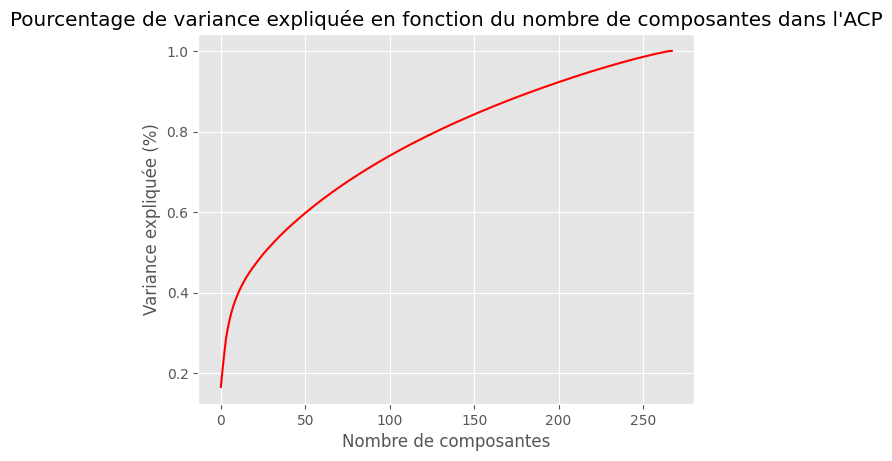

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'r')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée (%)')
plt.title("Pourcentage de variance expliquée en fonction du nombre de composantes dans l'ACP")
plt.show()

In [43]:
print("Variance expliquée avec 1 composante =", np.cumsum(pca.explained_variance_ratio_ *100)[0])
print("Variance expliquée avec 2 composantes =", np.cumsum(pca.explained_variance_ratio_ *100)[1])
print("Variance expliquée avec 3 composantes =", np.cumsum(pca.explained_variance_ratio_ *100)[2])
print("Variance expliquée avec 6 composantes =", np.cumsum(pca.explained_variance_ratio_ *100)[5])
print("Variance expliquée avec 50 composantes =", np.cumsum(pca.explained_variance_ratio_ *100)[49])

Variance expliquée avec 1 composante = 16.61206314835992
Variance expliquée avec 2 composantes = 20.906820654062688
Variance expliquée avec 3 composantes = 24.830428951881046
Variance expliquée avec 6 composantes = 32.92768419073488
Variance expliquée avec 50 composantes = 59.428263563758556


Nous n'avons ici pas réduit la dimension de nos données, c'est pour cela qu'on obtient un pourcentage de variance très proche de 100% en prenant en compte toutes les variables.

La première composante à elle seule explique seulement 17% de la variabilité de l'ensemble des données.
En prenant en compte la deuxième, on explique seulement 21% des données.

Le modèle est très mauvais et n'explique quasiment rien.


On va essayer de tenter de représenter les données en 2 et en 3 dimensions, même si le modèle explique que 21% de la variabilité des données.



In [44]:
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
X_pca2 = pca2.transform(X_scaled)

Text(0, 0.5, 'Deuxième composante principale')

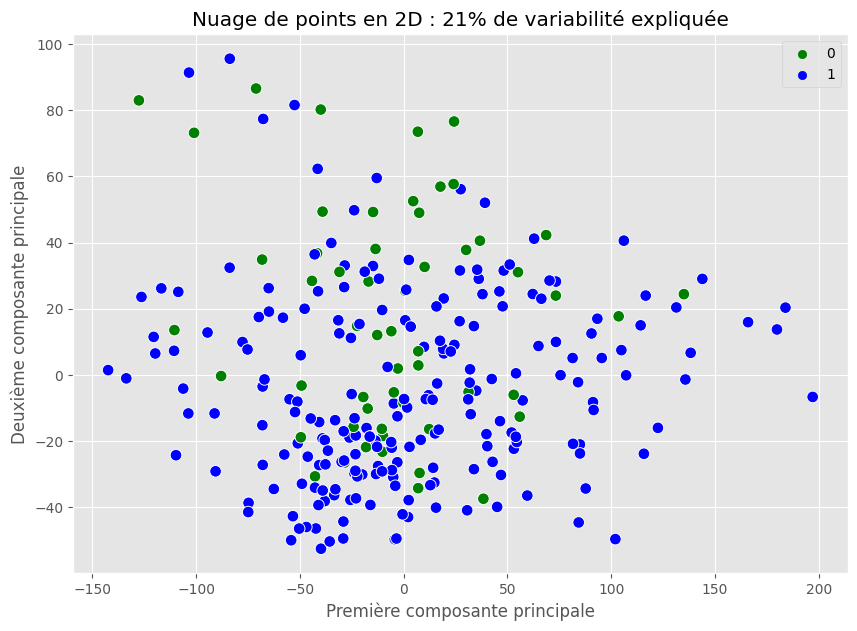

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, s=70, palette=['green','blue'],)

plt.title("Nuage de points en 2D : 21% de variabilité expliquée")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")

Aucune séparation nette, c'est cohérent avec les résultats obtenus de l'explication du modèle.

On peut essayer en dimension 3 (malgré le pourcentage faible expliqué).

In [46]:
pca3 = PCA(n_components=3)
pca3.fit(X_scaled)
X_pca3 = pca3.transform(X_scaled)

Text(0.5, 0, '3ème composante principale')

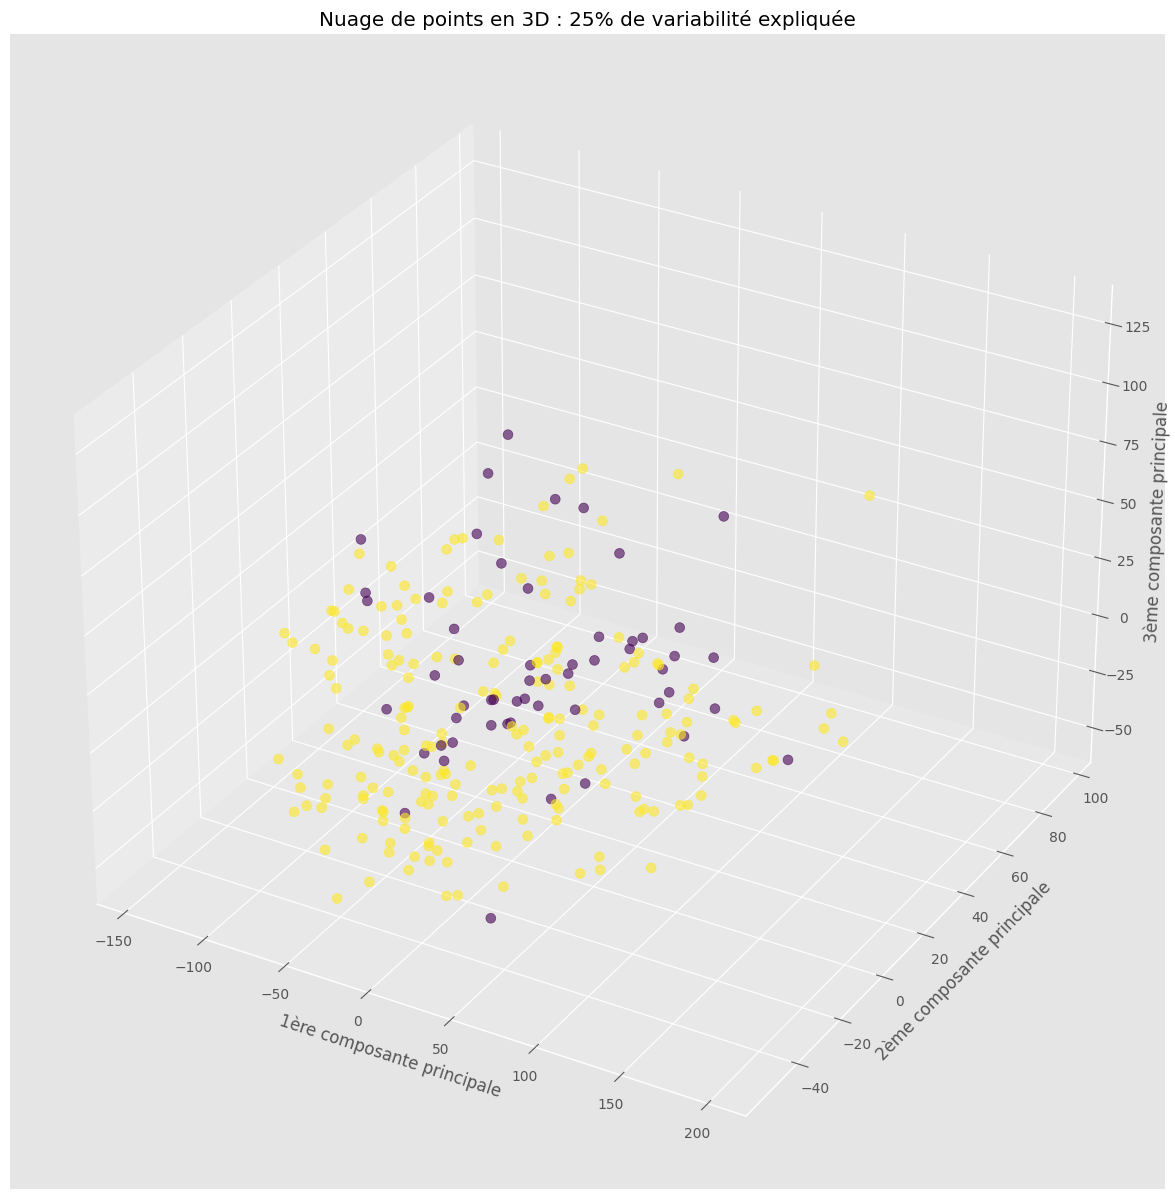

In [47]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], 
                    c=y, s=50, alpha=0.6)

plt.title("Nuage de points en 3D : 25% de variabilité expliquée")
ax.set_xlabel("1ère composante principale")
ax.set_ylabel("2ème composante principale")
ax.set_zlabel("3ème composante principale")

Nombre de composantes suggérées :  15


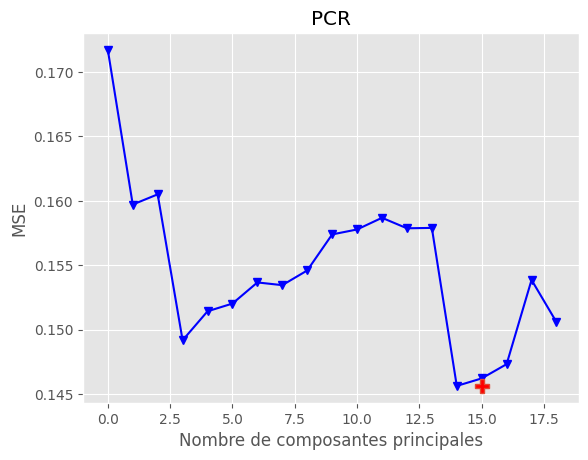

In [48]:
pca = PCA()

# Sépare les données en un jeu train (70%) et un jeu de test (30%)
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

# Scale les données train et test
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))

n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

regr = LinearRegression()

nb_components = np.arange(1,20,1)
# Calcule l'erreur MSE en ajoutant une composante principale à la fois en utilisant que les 19 premières composantes principales
for i in nb_components:
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Minimum de l'erreur MSE
msemin = np.argmin(mse)
print("Nombre de composantes suggérées : ", msemin+1)

plt.plot(np.array(mse), '-v', color='blue', mfc='blue')
plt.plot(nb_components[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('MSE')
plt.title('PCR')
plt.xlim(xmin=-1)
plt.show()

In [49]:
# Sélection des 15 premières composantes suggérées
regr.fit(X_reduced_train[:,:14], y_train)

# Prediction avec le train data
y_pred_train = regr.predict(X_reduced_train[:,:14])
mean_squared_error(y_train, y_pred_train)

0.13362921008324238

In [50]:
# Prediction avec le test data
y_pred_test = regr.predict(X_reduced_test[:,:14])
mean_squared_error(y_test, y_pred_test)

0.1218854402824175

On obtient des erreurs MSE relativement faibles même sur le jeu de données test. Le modèle n'est pas si mauvais.

### Régression PLS (Partial Least Squares)

Cette méthode permet également de réduire la dimension.

On souhaite optimiser la régression PLS sur notre jeu de données.
C'est-à-dire que l'on souhaite déterminer le nombre de composantes qui minimise l'erreur MSE et tester les performances de la validation croisée.

In [51]:
# Sépare les données en un jeu train (70%) et un jeu de test (30%)
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Nombre de composantes suggérées :  5


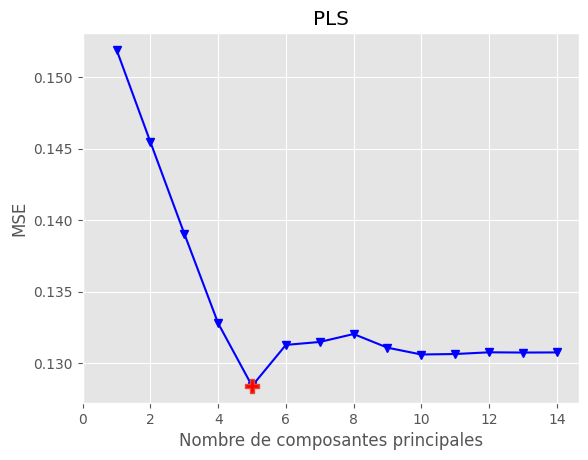

In [52]:
mse = []

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

nb_components = np.arange(1,15)

for i in nb_components:
    pls = PLSRegression(n_components=i)

    # Calcule l'erreur MSE en ajoutant une composante principale à la fois en utilisant que les 19 premières composantes principales
    score = -1*model_selection.cross_val_score(pls, X_train, y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Minimum de l'erreur MSE
msemin = np.argmin(mse)
print("Nombre de composantes suggérées : ", msemin+1)

plt.plot(nb_components, np.array(mse), '-v', color='blue', mfc='blue')
plt.plot(nb_components[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('MSE')
plt.title('PLS')
plt.xlim(xmin=0)
plt.show()

In [53]:
# Sélection des 5 premières composantes suggérés
pls_opti = PLSRegression(n_components=5)
pls_opti.fit(X_train, y_train)

# Prédiction avec le train data
y_pred_train_opti = pls_opti.predict(X_train)
mean_squared_error(y_train, y_pred_train_opti)

0.006506627589856361

In [54]:
# Prédiction avec le test data
y_pred_test = pls_opti.predict(X_test)
mean_squared_error(y_test, y_pred_test)

0.11436862237561833

On observe une erreur MSE très faible sur le jeu d'entrainement. Sur celui de test, l'erreur est faible mais plus importante.

On a peut-être perdu en explicabilité mais en sortie on obtient une erreur MSE correcte avec un nombre réduit de composantes.

Si on compare les méthodes PCR et PLS, on remarque que la méthode PLS est plus performante avec moins de composantes principales (15 contre 5 avec PLS).

### Régression LASSO

La méthode LASSO a pour but de contraindre les coefficients à se rapprocher de 0 en utilisant la régularisation L1 (norme L1 du vecteur de pondération i.e la somme des valeurs absolues des coefficients).

La conséquence de la régularisation L1 est lorsqu'on utilise la régression LASSO, certains coefficients valent exactement 0. Cela signifie que certaines variables sont totalement ignorées par le modèle.

Cela peut-être vu comme une forme de sélection automatique des variables. Le fait que certains coefficients soient nuls rend souvent un modèle plus simple à interpréter et peut également révéler quelles sont les variables les plus importantes dans le modèle.



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Première approche

In [56]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [57]:
# Affiche le R2 pour l'échantillon test et train
print('R2 : data train :', round(lasso.score(X_train, y_train), 2))
print('R2 : data test :', round(lasso.score(X_test, y_test), 2))

R2 : data train : 0.0
R2 : data test : -0.01


In [58]:
# Training data
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE data train :', round(mse_train, 2))

# Test data
pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE data test :', round(mse_test, 2))

MSE data train : 0.17
MSE data test : 0.15


In [59]:
pred

array([0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609626,
       0.78609626, 0.78609626, 0.78609626, 0.78609626, 0.78609

On peut remarquer que la méthode LASSO donne des résultats faibles, aussi bien sur le jeu de donnée d'apprentissage que celui test.

Cela indique un sous-apprentissage, en effet, il est clair car LASSO n'utilise aucune variable sur la totalité les 22290.

On va chercher à optimser la méthode, en utilisant le paramètre de pénalisation alpha qui contrôle l'impact de la méthode sur la valeur des coefficients.

On a utilisé précédemment un alpha égal à 1, pour réduire le sous-apprentissage, on va essayer de diminuer ce paramètre alpha.

Nous allons également augmenter le nombre d'itérations maximum à effectuer.

Ce sont ces deux paramètres qui sont les plus importants à ajuster.


#### Rôle du alpha

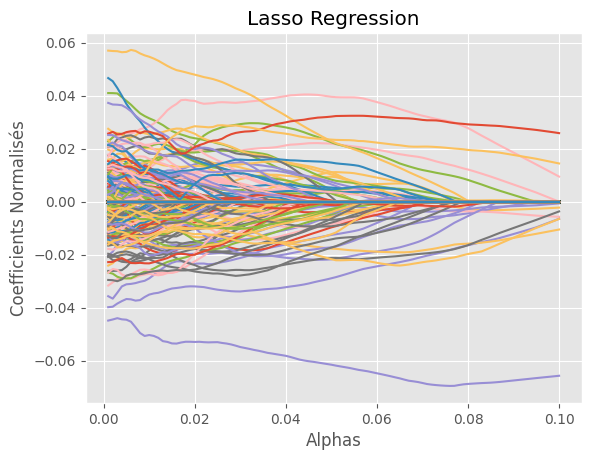

In [44]:
# On choisit de tracer les coefficients des différents modèles pour des alphas donnés
alphas = np.linspace(10**-3,10**-1,100)
lasso1 = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso1.set_params(alpha=a)
    lasso1.fit(X_train, y_train)
    coefs.append(lasso1.coef_)

plt.plot(alphas, coefs)
plt.xlabel('Alphas')
plt.ylabel('Coefficients Normalisés')
plt.title('Lasso Regression')
plt.show()

In [45]:
coefs[:10]

[array([-0.       ,  0.       , -0.0448798, ...,  0.       , -0.       ,
        -0.       ]),
 array([-0.      ,  0.      , -0.044459, ...,  0.      , -0.      ,
        -0.      ]),
 array([-0.        ,  0.        , -0.04397608, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.04440979, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.04455199, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.04530458, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.04740167, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.04957981, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.05068661, ...,  0.        ,
        -0.        , -0.        ]),
 array([-0.        ,  0.        , -0.05033412, ...,  0.        ,
        -0.        , -0.        ])]

Les coefficients semblent être tous égaux à 0. Le graphique n'est pas du tout pertinent.

#### LASSO en recherchant le alpha optimal

In [36]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [37]:
# Meilleure valeur de pénalisation choisi par validation croisée
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.045343101287413215)

In [38]:
print('R2 (data train) :', round(lasso_best.score(X_train, y_train), 2))
print('R2 (data test) :', round(lasso_best.score(X_test, y_test), 2))

R2 (data train) : 0.68
R2 (data test) : 0.27


In [39]:
# Prediction avec le train data
print("MSE (train) :", mean_squared_error(y_train, lasso_best.predict(X_train)))

MSE (train) : 0.053045321379368814


In [40]:
# Prediction avec le test data
print("MSE (test) :", mean_squared_error(y_test, lasso_best.predict(X_test)))

MSE (test) : 0.11018009787837002


#### Avec le meilleur alpha

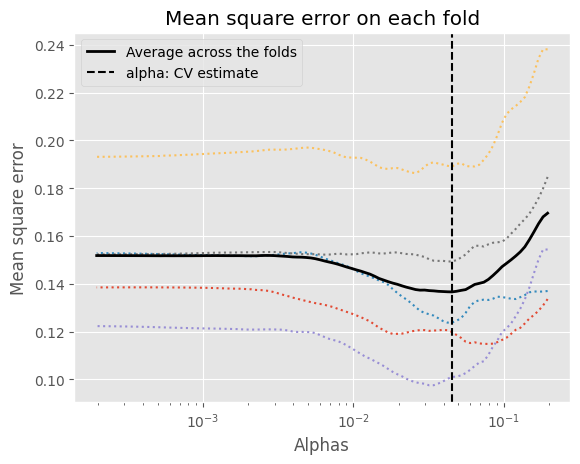

In [41]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("Alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.show()

On observe ici que la méthode LASSO avec le alpha optimal trouvé par validation croisée nous donne de trés bons résulats pour le jeu de données d'apprentissage comme pour le jeu de données test (R2 proche de 1 et une erreur MSE proche de 0).

Pour obtenir de meilleurs résultats, on aurait pu peut-être se concentrer uniquement sur les variables génétiques et en corrigeant les poids des deux classes.

### PCA Sparse + Régression

In [41]:
# Sépare les données en un jeu train (70%) et un jeu de test (30%)
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
SPCA = SparsePCA(n_components=2)
X_train = SPCA.fit_transform(X_train)
X_test = SPCA.transform(X_test)

In [52]:
z=SPCA.fit(X_train, y_train)
z

SparsePCA(n_components=2)

In [57]:
np.mean(SPCA.components_ == 0)

0.5

#### Graphique visualisant les points avec la méthode Sparse PCA

In [ ]:
plt.figure()
sns.scatterplot(x=z[:,0], y=z[:,1], hue=y, s=70, palette=['green','blue'],)

plt.title("Nuage de points en 2D pour Sparse PCA")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")

### Kernel PCA

In [78]:
# Sépare les données en un jeu train (70%) et un jeu de test (30%)
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [79]:
kpca= KernelPCA(n_components=2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [80]:
# On utilise le classifier de la régression logistique sur le jeu de données train qui permet de faire de la classification
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = model.predict(X_test)

In [82]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
print(confusion_matrix(y_test, y_pred))

[[ 0 15]
 [ 0 66]]


On observe que 0 valeurs ont été prédites pour la valeur pCR. Le modèle doit être amélioré.

In [84]:
print('Accuracy score :', round(accuracy_score(y_test, y_pred),2))

Accuracy score : 0.81


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        66

    accuracy                           0.81        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.66      0.81      0.73        81



Les scores des métriques semblent plutôt satisfaisant lorsqu'on prends en compte la pondération (nombre de classes).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


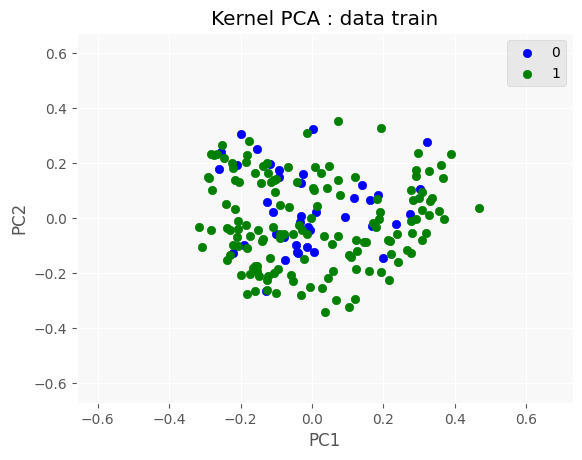

In [86]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white')))
plt.xlim(X1.min()/2, X1.max()/2)
plt.ylim(X2.min()/2, X2.max()/2)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)

plt.title('Kernel PCA : data train')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


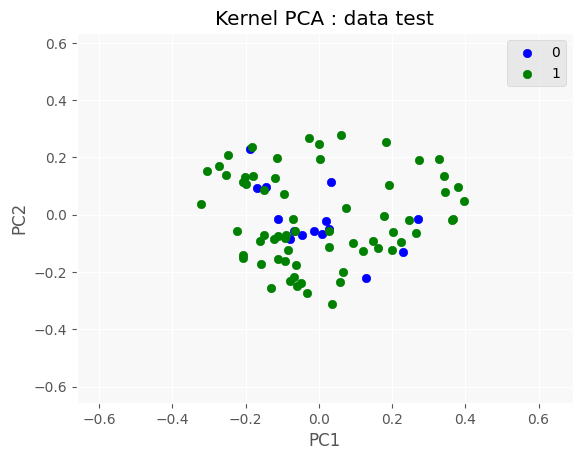

In [87]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white')))
plt.xlim(X1.min()/2, X1.max()/2)
plt.ylim(X2.min()/2, X2.max()/2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Kernel PCA : data test')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Il semblerait que les points verts correspond au traitement RD soit d'une majoritaire et forment une ellipse entourant les points bleus correspondant au traitement pCR.

On souhaite optimiser les paramètres du modèle.

In [88]:
clf=Pipeline([
    ("kcpa",KernelPCA(n_components=2)),
    ("logistic_regression",LogisticRegression())
            ])

# On choisit les paramètres que l'on veut tester
parametres=[{"kcpa__gamma":[0.02,0.04,0.05,1,10],
             "kcpa__kernel":["rbf","sigmoid","linear","poly"]
            }]

grid_search = GridSearchCV(estimator = clf,  
                           param_grid = parametres,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kcpa', KernelPCA(n_components=2)),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             param_grid=[{'kcpa__gamma': [0.02, 0.04, 0.05, 1, 10],
                          'kcpa__kernel': ['rbf', 'sigmoid', 'linear',
                                           'poly']}],
             scoring='accuracy')

In [89]:
# On cherche le meilleur modèle
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Paramètres donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print('\n\nEstimateur choisi par GridSearch :','\n\n', (grid_search.best_estimator_))

Meilleur score avec GridSearch CV : 0.7861


Paramètres donnant les meilleurs scores : 

 {'kcpa__gamma': 0.02, 'kcpa__kernel': 'rbf'}


Estimateur choisi par GridSearch : 

 Pipeline(steps=[('kcpa', KernelPCA(gamma=0.02, kernel='rbf', n_components=2)),
                ('logistic_regression', LogisticRegression())])


In [90]:
print('GridSearch CV score on data test : {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on data test : 0.8148


On obtient un très bon score sur le jeu de données test : 0.81.

In [91]:
# Implémentation du meilleur modèle
kpca_best= KernelPCA(n_components=2,kernel = 'rbf',gamma=0.02)
X_train = kpca_best.fit_transform(X_train)
X_test = kpca_best.transform(X_test)

# On utilise le classifier de la régression logistique sur le jeu de données train
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = model.predict(X_test)

In [93]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 0 15]
 [ 0 66]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        66

    accuracy                           0.81        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.66      0.81      0.73        81



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


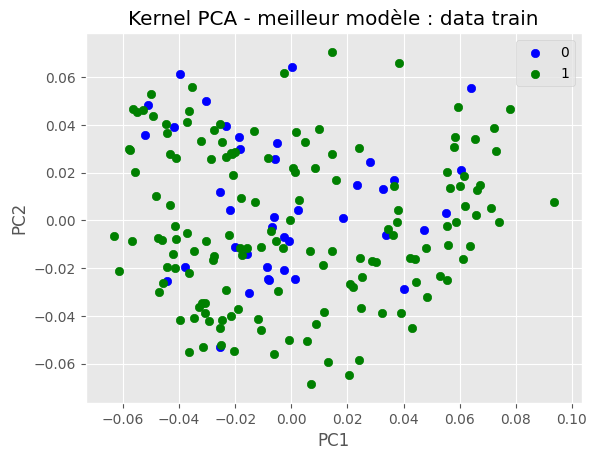

In [94]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 0.0001),
                     np.arange(start = X_set[:, 1].min() - 0.008, stop = X_set[:, 1].max() + 0.008, step = 0.0001))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)

plt.title('Kernel PCA - meilleur modèle : data train')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


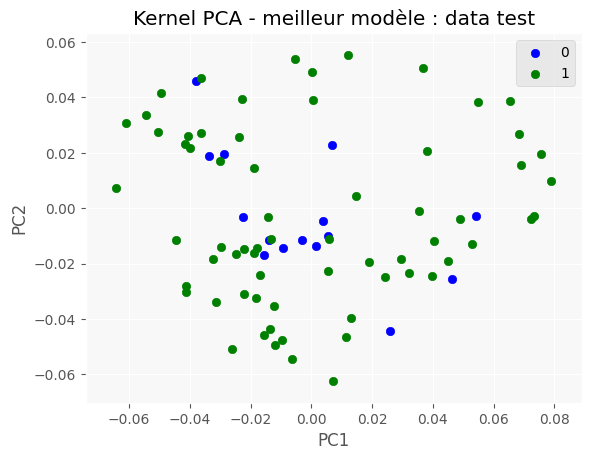

In [95]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 0.0001),
                     np.arange(start = X_set[:, 1].min() - 0.008, stop = X_set[:, 1].max() + 0.008, step = 0.0001))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('Kernel PCA - meilleur modèle : data test')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### SVM

Nous avons choisi d'illustrer la méthode SVM sur notre jeu de données.

L'algorithme SVM recherche un hyperplan le plus loin possible des observations des deux classes. La recherche d'un hyperplan passe par un problème d'optimisation où la bande séparatrice des deux classes est la plus vaste possible et où les données d'entrainement sont parfaitement classés.

Dans certains cas, il serait intéressant de se satisfaire d'un hyperplan qui permet de classer correctement un grand nombre de données d'entrainement mais pas toutes les données et où la bande séparant les deux classes est de plus grande marge.

L'algorithme SVM cherche à accroitre la marge séparatrice entre les deux classes et classer correctement un maximum de points de données d'entrainement. C'est ce que fait l'hyperparamètre C qui définit le degré du compromis entre ces deux objectifs.
Le paramètre C définit la pénalité associée à chaque observation d'entrainement mal classés.
- Plus la valeur de C est grande, moins la marge est large et le modèle tend à classer correctement un maximum de données d'entrainement.Le risque c'est d'avoir des performances élevées sur données entrainements et plus faible sur les données tests (sur-apprentissage).
- Au contraire, plus C est petit, plus grande est la marge séparatrice (l'algo accepte de mal classés les observations). Plus le modèle est généralisable.

Le paramètre gamma est utilisé avec des fonctions de noyaux non linéaires et permet d'indiquer le niveau d'influence de chaque observation du jeu de données d'entrainement.
Lorsque gamma est élevé, deux observations font être regroupés ensemble que si elles sont très proches entre elles. Au contraire, gamma faible, les observations sont réparties dans des groupes de façon quasi linéaire.
Gamma permet de contôler le niveau de courbure de l'hyperplan séparant les deux classes.

On choisit de prendre un noyau de type linéaire mais il en existe d'autres (non linéaire, polynomiale, sigmoïde). Le noyau est une fonction qui sert à transformer les données dans une représentation spécifique.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [97]:
# Crée un SVM Classifier
svm = SVC(kernel='linear') 

svm.fit(X_train, y_train)

SVC(kernel='linear')

A ce stade, le modèle a bien défini un hyperplan qui sépare les deux classes associées aux données d'entrainement.
Cet hyperplan est principalement défini par les vecteurs supports.

In [98]:
print("Le nombre de vecteurs supports est de :", len(svm.support_vectors_))

Le nombre de vecteurs supports est de : 155


In [99]:
# Nombre de vecteurs supports par classe
print("Le nombre de vecteurs supports pour la classe 0 :", svm.n_support_[0])
print("Le nombre de vecteurs supports pour la classe 1 :", svm.n_support_[1])

# Lien avec la variable réponse treatment_response

Le nombre de vecteurs supports pour la classe 0 : 40
Le nombre de vecteurs supports pour la classe 1 : 115


In [100]:
# Prediction de la réponse pour le jeu test
y_pred = svm.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8765432098765432
Precision: 0.9
Recall: 0.9545454545454546


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.90      0.95      0.93        66

    accuracy                           0.88        81
   macro avg       0.81      0.74      0.77        81
weighted avg       0.87      0.88      0.87        81



On observe que toutes les métriques ont des très bons scores (proches de 1). Cette méthode s'adapte bien à notre jeu de données compte tenu du déséquilibre des deux classes.

<AxesSubplot: >

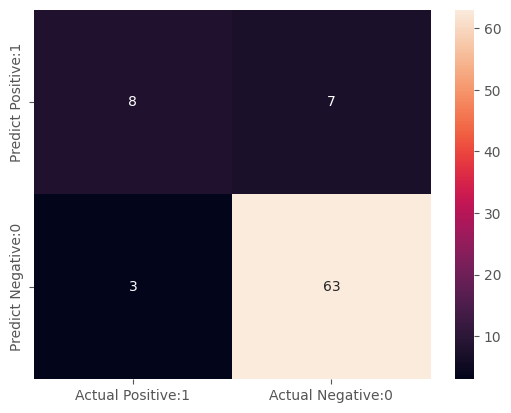

In [103]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

In [104]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 8  7]
 [ 3 63]]

True Positives(TP) =  8

True Negatives(TN) =  63

False Positives(FP) =  7

False Negatives(FN) =  3


La matrice de confusion montre 9+63 = 72 bonnes prédictions et 6+3 = 9 mauvaises prédictions.


#### Optimisation des hyperparamètres en utilisant GridSearchCV


In [105]:
svc=SVC() 

# On choisit les paramètres que l'on veut tester
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [106]:
# On cherche le meilleur modèle
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parametres donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print('\n\nEstimateur choisi par GridSearch :','\n\n', (grid_search.best_estimator_))

Meilleur score avec GridSearch CV : 0.8128


Parametres donnant les meilleurs scores : 

 {'C': 1, 'kernel': 'linear'}


Estimateur choisi par GridSearch : 

 SVC(C=1, kernel='linear')


In [107]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8765


Il semblerait que le meilleur modèle donnant une meilleur prédiction est celui avec le noyau linéaire avec C=1 en utilisant le score accuracy.
C'est celui testé précédemment.

On pourrait choisir d'optimiser le modèle en utilisant différents scores comme "precision" et "recall".

In [108]:
svc=SVC() 

# On choisit les paramètres que l'on veut tester
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='precision')

In [109]:
# On cherche le meilleur modèle
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print('\n\nEstimateur choisi par GridSearch :','\n\n', (grid_search.best_estimator_))

Meilleur score avec GridSearch CV : 0.8392


Parameters donnant les meilleurs scores : 

 {'C': 1, 'kernel': 'linear'}


Estimateur choisi par GridSearch : 

 SVC(C=1, kernel='linear')


En utilisant la recherche du meilleur modèle en se basant sur le score "precision", on obtient le même modèle que pour le score "accuracy", à savoir le SVM avec le noyau linéaire et C=1.

In [110]:
svc=SVC() 

# On choisit les paramètres que l'on veut tester
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='recall')

In [111]:
# On cherche le meilleur modèle
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print('\n\nEstimateur choisi par GridSearch :','\n\n', (grid_search.best_estimator_))

Meilleur score avec GridSearch CV : 1.0000


Parameters donnant les meilleurs scores : 

 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Estimateur choisi par GridSearch : 

 SVC(C=1, gamma=0.1)


On obtient un autre modèle en utilisant le score recall.

Par ailleurs, SVM est une méthode très rapide d'exécution.

On souhaite maintenant comparer les deux modèles retenus.

In [113]:
svm_best1 = SVC(kernel='linear', C=1) 
svm_best1.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [114]:
# Prediction de la réponse pour le jeu test
y_pred = svm_best1.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8765432098765432
Precision: 0.9
Recall: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.90      0.95      0.93        66

    accuracy                           0.88        81
   macro avg       0.81      0.74      0.77        81
weighted avg       0.87      0.88      0.87        81



In [116]:
svm_best2 = SVC(kernel='rbf', C=1, gamma=0.01) 
svm_best2.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [117]:
# Prediction de la réponse pour le jeu test
y_pred = svm_best2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [118]:
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8148148148148148
Precision: 0.8148148148148148
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        66

    accuracy                           0.81        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.66      0.81      0.73        81



Celui semble moins bon que le premier même en se basant sur le recall.
On privilégera le premier modèle (noyau linéaire et C=1).

### Random Forest

On va maintenant s'intéresser aux arbres de décision et à l'algorithme Random Forest.

Le principe des arbres de décision est de découper un ensemble d'observations en groupes homogènes en se basant sur des règles appliquées sur les variables descriptives X.
Les algorithmes Random Forest sont basés sur les arbres de décision et permettent d'obtenir des modèles prédictifs plus stables qu'avec un algorithme CART par exemple.
Ils sont aussi très intuitifs et faciles à comprendre.

Notre but ici de prédire si une nouvelle observation est de type RD ou pCR.

Le dernier arbre construit correspond à un système de décision basé sur l'ensemble des observations initiales qui permet de catégoriser les observations : soit dans la classe RD, soit dans la classe pcR. Chaque feuille de cet arbre correspond à une règle de classification (résultat majoritaire qui l'emporte). Ainsi, on pourra trouver la classe d'une nouvelle observation en parcourant l'arbre à l'aide des valeurs de X et Y.

Lors de la construction d'un arbre de décision, les opérations de sélection de variables au niveau des différents noeuds seront répétées jusqu'à ce qu'un critère d'arrêt soit atteint.

Plusieurs paramètres sont à prendre en compte : la profondeur de l'arbre de décision (nombre de niveaux qu'il contient) et le choix des variables.

On note qu'un arbre de décision de petite taille va présenter un problème de sous-apprentissage et au contraire, un arbre profond va présenter un problème de sur-apprentissage.
On cherchera alors la profondeur optimale minimale où l'erreur test n'évolue plus.

Comme l'algorithme Random Forest construit plusieurs arbres de décision à partir d'un ensemble d'échantillons dans le jeu d'apprentissage. Pour chaque échantillon tiré, un arbre est construit. Ainsi, le nombre d'arbres à construire est également un paramètre important.


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [120]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=0)

In [121]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [122]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [123]:
y_pred = rfc.predict(X_test)

In [124]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [125]:
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8271604938271605
Precision: 0.825
Recall: 1.0


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.82      1.00      0.90        66

    accuracy                           0.83        81
   macro avg       0.91      0.53      0.51        81
weighted avg       0.86      0.83      0.76        81



On obtient de très bons scores pour cette première version avec l'algorithme Random Forest (tous proche 0.80)

On va chercher à optimiser les paramètres en utilisant GridSearchCV et la validation croisée.

In [128]:
rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [3, 5, 10, 100, 200],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search =  GridSearchCV(estimator=rfc, 
                            param_grid=param_grid, 
                            cv= 5,
                            verbose=0)
                            
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [3, 5, 10, 100, 200]})

In [129]:
print('Meilleur score avec GridSearch CV : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parametres donnant les meilleurs scores :','\n\n', (grid_search.best_params_))

print('\n\nEstimateur choisi par GridSearch :','\n\n', (grid_search.best_estimator_))

Meilleur score avec GridSearch CV : 0.7966


Parametres donnant les meilleurs scores : 

 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 5}


Estimateur choisi par GridSearch : 

 RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=5,
                       random_state=0)


In [130]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8148


#### Meilleur modèle

In [133]:
rfc_best=RandomForestClassifier(random_state=0, max_features='log2', n_estimators= 5, max_depth=7, criterion='gini')

In [134]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=5,
                       random_state=0)

In [135]:
y_pred=rfc_best.predict(X_test)

In [136]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8148148148148148
Precision: 0.8591549295774648
Recall: 0.9242424242424242


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        15
           1       0.86      0.92      0.89        66

    accuracy                           0.81        81
   macro avg       0.68      0.63      0.65        81
weighted avg       0.79      0.81      0.80        81



<AxesSubplot: >

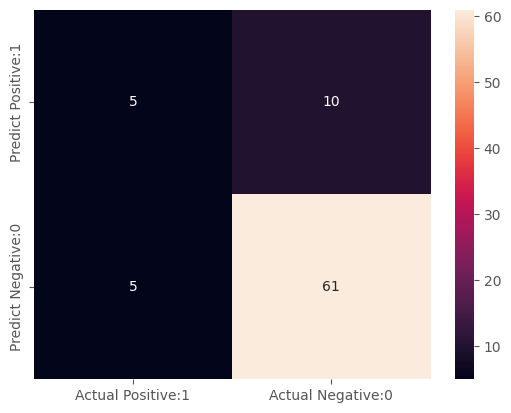

In [139]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

In [140]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5 10]
 [ 5 61]]

True Positives(TP) =  5

True Negatives(TN) =  61

False Positives(FP) =  10

False Negatives(FN) =  5


#### Visualisation des variables les plus importantes

In [141]:
rfc_best.feature_importances_
feature_names = [f"feature {i}" for i in range(data_final1.shape[1])]
feature_scores = pd.Series(rfc_best.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_scores = feature_scores[:10]
feature_scores

feature 15757    0.037533
feature 3979     0.036765
feature 3579     0.035640
feature 21265    0.030696
feature 13413    0.030184
feature 11804    0.030008
feature 14143    0.027774
feature 13671    0.027374
feature 21085    0.025901
feature 9742     0.025450
dtype: float64

#### Représentation graphique des 20 premières variables les plus importantes dans le modèle Random Forest

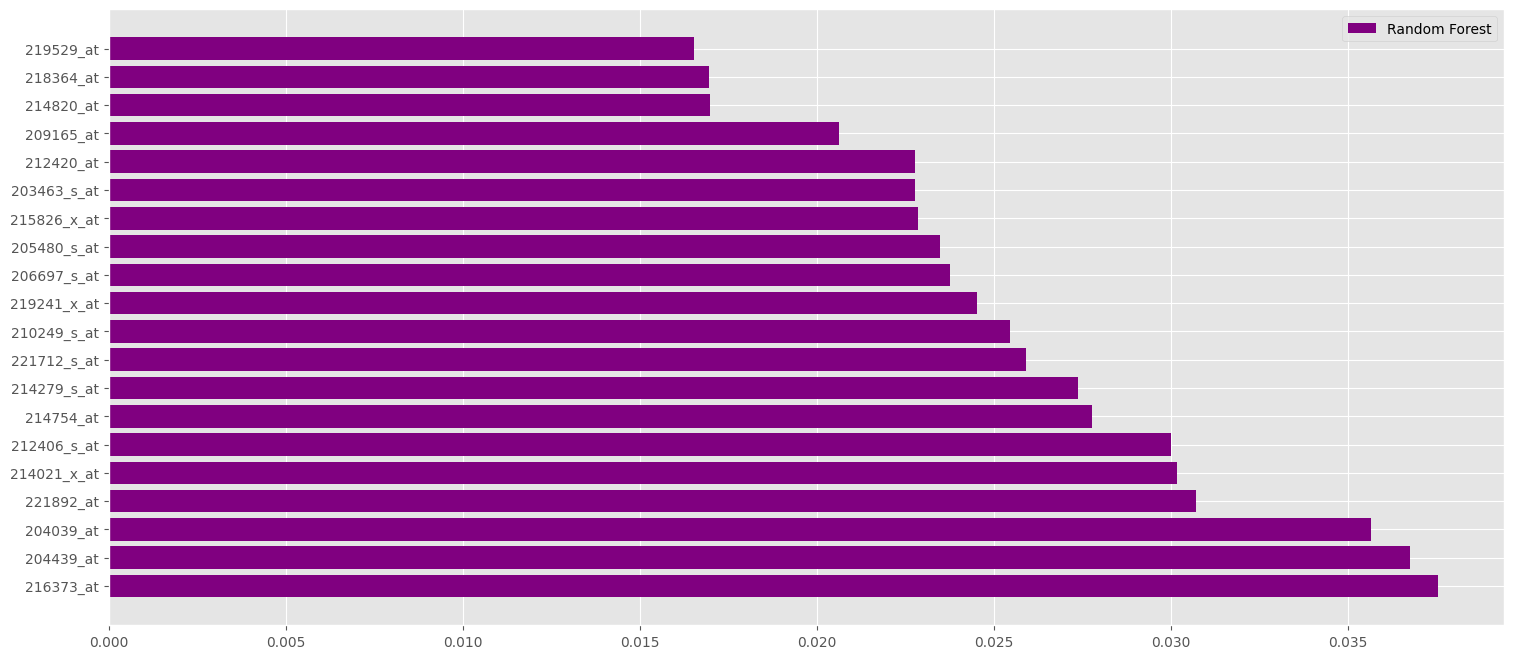

In [142]:
feature_importance = pd.DataFrame({'rfc':rfc_best.feature_importances_},index = data_final1.columns)
feature_importance.sort_values('rfc',ascending = False,inplace = True)
feature_importance = feature_importance[:20]
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (18,8))
rfc_feature = ax.barh(index, feature_importance['rfc'], color = 'purple', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)
ax.legend()
plt.show()

On remarque que sur l'échelle des abscisses, leur corrélation est trés faible mais trois variables semblent être plus importantes que les autres.

### Conclusion sur cette analyse :

Au vue des méthodes utilisées pour analyser la réaction au traitement. Certaines semblent plus efficaces que d'autres si on compare l'erreur MSE pour les méthodes de régression et par exemple l'accuracy, le recall et la précision pour les méthodes de classification.

On a pu remarquer, que la méthode PLS nécessite beaucoup moins de composantes que la méthode PCR. Il serait judicieux de l'utiliser.

De plus, la méthode de pénalisation LASSO permet aussi de réduire le nombre de variables. Tout comme les méthodes de classification comme les SVM ont permit d'apporter des résultats satisfaisants.


En implémentant ces méthodes, certaines prennent davantage de temps notamment lors de la recherche d'un meilleur modèle du fait de nos données en grande dimension mais aussi par le nombre de possibilités de combinaisons possibles de paramètres. On a pu remarquer que les SVM, Kernel PCA et Random Forest sont très efficaces.

De plus, il serait également intéressant de visualiser quelles sont les variables les plus importantes dans tous les modèles pour pouvoir les comparer aux modèles de Random Forest. Et au contraire, quelles sont les variables qui ont le moins d'influence pour prédire la variable réponse. Nous avons vu grâce au coefficient de corrélation, que toutes les variables avaient un coefficient de corrélation à la variables réponse inférieure à 0.2. Ce qui est cohérent avec l'échelle trouvée par les Random Forest.

Comme les arbres de décision sont efficaces pour des problèmes de classification, on a utilisé la méthode Random Forest. Elle nous a donné de très bons résultats en permettant notamment de visualiser les variables les plus importantes.


On remarque tout de même que les méthodes de régression sont ici moins adaptées pour un problème de classification. En effet, les SVM et les Random Forest fournissent des prédictions meilleures. En effet, lorsqu'on visualise le vecteur des prédictions, il ne prédit pas tout le temps 1, il y a des 0, les scores sont meilleurs et les résultats sont plus facilement interprétables.